***Определение перспективного тарифа для телеком-компании***

Шаг 1. Откройте файл с данными и изучите общую информацию
Путь к файлам:
/datasets/calls.csv. Скачать датасет
/datasets/internet.csv. Скачать датасет
/datasets/messages.csv. Скачать датасет
/datasets/tariffs.csv. Скачать датасет
/datasets/users.csv. Скачать датасет

DONE-----------------------------------------------------------------------------------------------------------------

Шаг 2. Подготовьте данные

Приведите данные к нужным типам;

Найдите и исправьте ошибки в данных, если они есть.

Поясните, какие ошибки вы нашли и как их исправили. В данных вы найдёте звонки с нулевой продолжительностью. 

Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.

DONE-----------------------------------------------------------------------------------------------------------------

Посчитайте для каждого пользователя:
количество сделанных звонков и израсходованных минут разговора по месяцам;
количество отправленных сообщений по месяцам;
объем израсходованного интернет-трафика по месяцам;
помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

DONE-----------------------------------------------------------------------------------------------------------------

Шаг 3. Проанализируйте данные
Опишите поведение клиентов оператора, исходя из выборки. 
Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 
Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

DONE-----------------------------------------------------------------------------------------------------------------

Шаг 4. Проверьте гипотезы
средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Пороговое значение alpha задайте самостоятельно.
Поясните:
как вы формулировали нулевую и альтернативную гипотезы;
какой критерий использовали для проверки гипотез и почему.

DONE------------------------------------------------------------------------------------------------------------------

Шаг 5. Напишите общий вывод

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from scipy import stats as st

In [2]:
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')

**1.РАССМОТРИМ ДАННЫЕ**

In [3]:
display(users.head(10))
print('----------------------------------------------------------------------------------')
display(users.describe())
print('----------------------------------------------------------------------------------')
users.info()
print('----------------------------------------------------------------------------------')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


----------------------------------------------------------------------------------


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


----------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
----------------------------------------------------------------------------------


*В условиях сказано, что столбец с датой прекращения пользования тарифом может иметь пропуски, так как на момент выгрузки данных клиент пользовался тарифом.* 
*Необходимо перевести churn_date, reg_date в формат даты.*

In [4]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format="%Y-%m-%d")
users['reg_date'] = pd.to_datetime(users['reg_date'], format="%Y-%m-%d")
#users.info()

In [5]:
display(calls.head(10))
print('----------------------------------------------------------------------------------')
display(calls.describe())
print('----------------------------------------------------------------------------------')
calls.info()
print('----------------------------------------------------------------------------------')

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


----------------------------------------------------------------------------------


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


----------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
----------------------------------------------------------------------------------


*call_date необходимо перевести в формат даты. Столбец id переведем в формат int* 

*duration округлим в большую сторону, согласно условиям рассчета использования тарифов в компании.
Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять*

In [6]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format="%Y-%m-%d")
calls['id'] = calls['id'].astype('int')
calls['duration'] = calls['duration'].apply(np.ceil).astype('int')
#calls.info()

In [7]:
display(messages.head(10))
print('----------------------------------------------------------------------------------')
display(messages.describe())
print('----------------------------------------------------------------------------------')
messages.info()
print('----------------------------------------------------------------------------------')

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


----------------------------------------------------------------------------------


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


----------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
----------------------------------------------------------------------------------


*Аналогично по дате и id*

In [8]:
messages['id'] = messages['id'].astype('int')
messages['message_date'] = pd.to_datetime(messages['message_date'], format="%Y-%m-%d")
#messages.info()

In [9]:
display(internet.head(10))
print('----------------------------------------------------------------------------------')
display(internet.describe())
print('----------------------------------------------------------------------------------')
internet.info()
print('----------------------------------------------------------------------------------')

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


----------------------------------------------------------------------------------


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


----------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
----------------------------------------------------------------------------------


*Аналогично по дате и id*

In [10]:
internet['id'] = internet['id'].astype('int')
internet['session_date'] = pd.to_datetime(internet['session_date'], format="%Y-%m-%d")
#internet.info()

In [11]:
display(tariffs.head(10))
print('----------------------------------------------------------------------------------')
display(tariffs.describe())
print('----------------------------------------------------------------------------------')
tariffs.info()
print('----------------------------------------------------------------------------------')

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


----------------------------------------------------------------------------------


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


----------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
----------------------------------------------------------------------------------


*Отклонений не обнаружено*

**2. ОБРАБОТАЕМ ДАННЫЕ**

*Добавим столбец с месяцем*

In [12]:
calls['month'] = calls['call_date'].dt.month
calls.head(10)

,id,call_date,duration,user_id,month
0,10000,2018-07-25,0,1000,7
1,10001,2018-08-17,0,1000,8
2,10002,2018-06-11,3,1000,6
3,10003,2018-09-21,14,1000,9
4,10004,2018-12-15,6,1000,12
5,10005,2018-11-02,0,1000,11
6,10006,2018-10-18,0,1000,10
7,10007,2018-08-22,19,1000,8
8,10008,2018-09-15,19,1000,9
9,10009,2018-08-15,0,1000,8


*Сформируем сгруппированную таблицу по количеству и продолжительности звонков в месяц*

In [13]:
user_calls = calls.groupby(['user_id', 'month']).agg({'duration':'sum', 'id':'count'}).reset_index().rename(columns={'id':'calls_count'})
user_calls.head(10)

,user_id,month,duration,calls_count
0,1000,5,159,22
1,1000,6,172,43
2,1000,7,340,47
3,1000,8,408,52
4,1000,9,466,58
5,1000,10,350,57
6,1000,11,338,43
7,1000,12,333,46
8,1001,11,430,59
9,1001,12,414,63


*Аналогичные действия применим к остальным фреймам*

In [14]:
messages['month'] = messages['message_date'].dt.month
messages.head(10)

,id,message_date,user_id,month
0,10000,2018-06-27,1000,6
1,10001,2018-10-08,1000,10
2,10002,2018-08-04,1000,8
3,10003,2018-06-16,1000,6
4,10004,2018-12-05,1000,12
5,10005,2018-06-20,1000,6
6,10006,2018-11-19,1000,11
7,10007,2018-10-29,1000,10
8,10008,2018-06-25,1000,6
9,10009,2018-12-18,1000,12


In [15]:
user_messages = messages.groupby(['user_id', 'month']).agg({'id':'count'}).reset_index().rename(columns={'id':'msg_count'})
user_messages.head(10)

,user_id,month,msg_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
5,1000,10,73
6,1000,11,58
7,1000,12,70
8,1002,6,4
9,1002,7,11


In [16]:
internet['month'] = internet['session_date'].dt.month
internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,10000,112.95,2018-11-25,1000,11
1,1,10001,1052.81,2018-09-07,1000,9
2,2,10002,1197.26,2018-06-25,1000,6
3,3,10003,550.27,2018-08-22,1000,8
4,4,10004,302.56,2018-09-24,1000,9
5,5,10005,399.97,2018-10-02,1000,10
6,6,10006,540.08,2018-09-07,1000,9
7,7,10007,415.70,2018-07-11,1000,7
8,8,10008,505.40,2018-10-08,1000,10
9,9,10009,345.54,2018-09-03,1000,9


In [17]:
user_internet = internet.groupby(['user_id', 'month']).agg({'mb_used':'sum'}).reset_index()
user_internet.head(10)

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
5,1000,10,14702.49
6,1000,11,14756.47
7,1000,12,9817.61
8,1001,11,18429.34
9,1001,12,14036.66


*Объединим все в одну таблицу*

In [18]:
data = user_calls.merge(user_messages, on=['user_id','month'], how='outer')
data = data.merge(user_internet, on=['user_id','month'], how = 'outer')
data = data.merge(users, on='user_id', how='left')
tariffs = tariffs.rename(columns={'tariff_name':'tariff'}) #чтобы смэтчить, прилост переименовать столбец
data = data.merge(tariffs, on='tariff', how='left')
data.head(10)

,user_id,month,duration,calls_count,msg_count,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159.0,22.0,22.0,2253.49,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,172.0,43.0,60.0,23233.77,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,340.0,47.0,75.0,14003.64,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,408.0,52.0,81.0,14055.93,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,466.0,58.0,57.0,14568.91,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
5,1000,10,350.0,57.0,73.0,14702.49,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
6,1000,11,338.0,43.0,58.0,14756.47,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
7,1000,12,333.0,46.0,70.0,9817.61,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
8,1001,11,430.0,59.0,NaN,18429.34,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,50,15360,500,550,200,3,3
9,1001,12,414.0,63.0,NaN,14036.66,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,50,15360,500,550,200,3,3


**Проверим на пропуски**

In [19]:
data.isna().sum()

user_id                     0
month                       0
duration                   40
calls_count                40
msg_count                 497
mb_used                    11
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

*Заменим пропуски нулями в 4х столбцах у юзеров,которые не писали или не звонили, или не отправляли смс, или не использовали трафик*

In [20]:
data['duration'] = data['duration'].fillna(0)
data['calls_count'] = data['calls_count'].fillna(0)
data['msg_count'] = data['msg_count'].fillna(0)
data['mb_used'] = data['mb_used'].fillna(0)
data.isna().sum()

user_id                     0
month                       0
duration                    0
calls_count                 0
msg_count                   0
mb_used                     0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

**Проверим дубли**

In [21]:
data.duplicated().sum()

0

*Дубли отсутствуют*

**Напишем функцию, которая рассчитает траты за превышение лимитов тарифа**

In [22]:
def exceeding_the_tariff_limits(row):
    msg = (row['msg_count'] - row['messages_included']) * row['rub_per_message']
    mins = (row['calls_count'] - row['minutes_included']) * row['rub_per_minute']
    gbs = np.floor((row['mb_used'] - row['mb_per_month_included']) * row['rub_per_gb'] / 1024)
    total = 0
    for i in [msg, mins, gbs]:
        if i > 0:
            total += i
    return total

In [23]:
data['exceeding_the_tariff_limits'] = data.apply(lambda x: exceeding_the_tariff_limits(x), axis=1)

In [24]:
display(data.sort_values(by='exceeding_the_tariff_limits',ascending=False).head(10))

,user_id,month,duration,calls_count,msg_count,mb_used,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,exceeding_the_tariff_limits
3106,1486,12,1007.0,133.0,83.0,38552.45,35,NaT,Нижний Новгород,Матвей,...,2018-10-31,smart,50,15360,500,550,200,3,3,4628.0
260,1042,12,728.0,121.0,75.0,37165.69,42,NaT,Хабаровск,Константин,...,2018-11-25,smart,50,15360,500,550,200,3,3,4333.0
3105,1486,11,764.0,108.0,96.0,36266.11,35,NaT,Нижний Новгород,Матвей,...,2018-10-31,smart,50,15360,500,550,200,3,3,4221.0
615,1098,12,588.0,80.0,14.0,36523.90,39,NaT,Челябинск,Элеонора,...,2018-06-23,smart,50,15360,500,550,200,3,3,4133.0
1793,1286,12,739.0,95.0,68.0,35108.07,19,NaT,Москва,Рашид,...,2018-11-27,smart,50,15360,500,550,200,3,3,3911.0
1000,1159,12,734.0,110.0,2.0,35135.89,64,NaT,Красноярск,Эльга,...,2018-11-28,smart,50,15360,500,550,200,3,3,3862.0
1914,1306,12,484.0,66.0,0.0,34912.13,21,NaT,Чита,Радим,...,2018-11-30,smart,50,15360,500,550,200,3,3,3818.0
1069,1172,6,541.0,73.0,2.0,33886.40,40,NaT,Санкт-Петербург,Алан,...,2018-05-05,smart,50,15360,500,550,200,3,3,3618.0
1073,1172,10,356.0,57.0,4.0,32740.38,40,NaT,Санкт-Петербург,Алан,...,2018-05-05,smart,50,15360,500,550,200,3,3,3394.0
1622,1261,12,1074.0,141.0,22.0,32650.91,46,NaT,Казань,Мадина,...,2018-10-30,smart,50,15360,500,550,200,3,3,3377.0


**Рассчитаем выручку по каждому клиенту**

In [25]:
data['total_payment'] = data['rub_monthly_fee']+data['exceeding_the_tariff_limits']
display(data.sort_values(by='total_payment',ascending=False).head(10))

,user_id,month,duration,calls_count,msg_count,mb_used,age,churn_date,city,first_name,...,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,exceeding_the_tariff_limits,total_payment
3106,1486,12,1007.0,133.0,83.0,38552.45,35,NaT,Нижний Новгород,Матвей,...,smart,50,15360,500,550,200,3,3,4628.0,5178.0
260,1042,12,728.0,121.0,75.0,37165.69,42,NaT,Хабаровск,Константин,...,smart,50,15360,500,550,200,3,3,4333.0,4883.0
3105,1486,11,764.0,108.0,96.0,36266.11,35,NaT,Нижний Новгород,Матвей,...,smart,50,15360,500,550,200,3,3,4221.0,4771.0
782,1124,10,1225.0,152.0,121.0,49745.69,54,NaT,Махачкала,Альбин,...,ultra,1000,30720,3000,1950,150,1,1,2786.0,4736.0
615,1098,12,588.0,80.0,14.0,36523.90,39,NaT,Челябинск,Элеонора,...,smart,50,15360,500,550,200,3,3,4133.0,4683.0
1499,1240,8,457.0,54.0,0.0,48351.59,30,NaT,Воронеж,Зинаида,...,ultra,1000,30720,3000,1950,150,1,1,2582.0,4532.0
1793,1286,12,739.0,95.0,68.0,35108.07,19,NaT,Москва,Рашид,...,smart,50,15360,500,550,200,3,3,3911.0,4461.0
1000,1159,12,734.0,110.0,2.0,35135.89,64,NaT,Красноярск,Эльга,...,smart,50,15360,500,550,200,3,3,3862.0,4412.0
1914,1306,12,484.0,66.0,0.0,34912.13,21,NaT,Чита,Радим,...,smart,50,15360,500,550,200,3,3,3818.0,4368.0
1069,1172,6,541.0,73.0,2.0,33886.40,40,NaT,Санкт-Петербург,Алан,...,smart,50,15360,500,550,200,3,3,3618.0,4168.0


**3. ПРОАНАЛИЗИРУЕМ ДАННЫЕ**

**Посмотрим на общий срез по данным**

In [26]:
data[['exceeding_the_tariff_limits', 'total_payment']].describe()

,exceeding_the_tariff_limits,total_payment
count,3214.000000,3214.000000
mean,418.794026,1397.854387
std,652.765367,759.991640
min,0.000000,550.000000
25%,0.000000,580.000000
50%,15.000000,1390.000000
75%,692.500000,1950.000000
max,4628.000000,5178.000000


In [27]:
data['tariff'].value_counts()

smart    2229
ultra     985
Name: tariff, dtype: int64

**Выведем диаграмму размаха**

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(0, 6000)

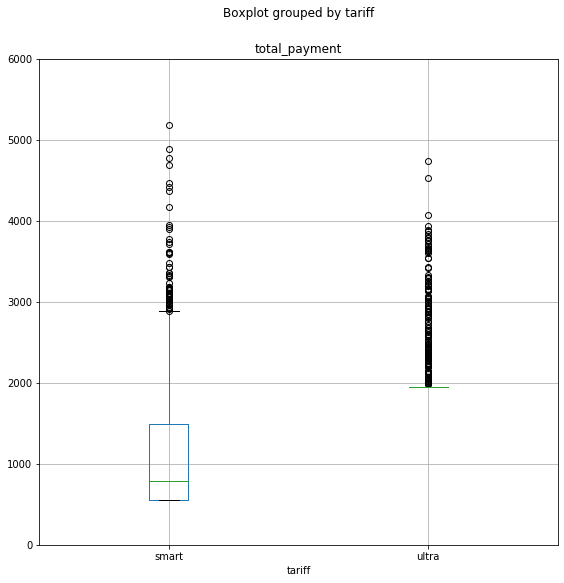

In [28]:
data.boxplot('total_payment', by='tariff', figsize=(9,9)).set_ylim(0,6000)

*Трудно по данной диаграмме судить об использовании тарифов. В связи с этим рассчитаем медианную и среднюю по каждому тарифу и построим гистограммы*

In [29]:
data.groupby('tariff').agg({'duration':['median','mean']})

duration            
         median        mean
tariff                     
smart     422.0  417.934948
ultra     518.0  526.623350

*Разброса между медианными и средними значениями нет*

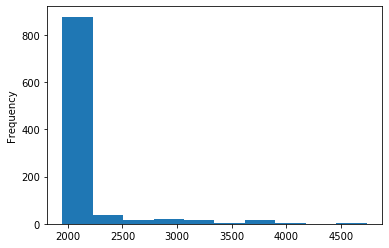

In [30]:
data[data['tariff'] == 'ultra']['total_payment'].plot(kind='hist', bins=10)

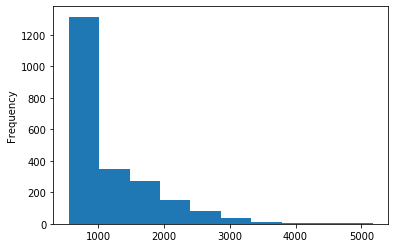

In [31]:
data[data['tariff'] == 'smart']['total_payment'].plot(kind='hist', bins=10)

*По графикам видно, что чаще на смарте выходят за лимиты тарифа*

**Рассмотрим звонки по тарифам**

In [32]:
data.groupby('tariff').agg({'duration':['median','mean']})

duration            
         median        mean
tariff                     
smart     422.0  417.934948
ultra     518.0  526.623350

*Разброса нет, все в рамках лимитов*

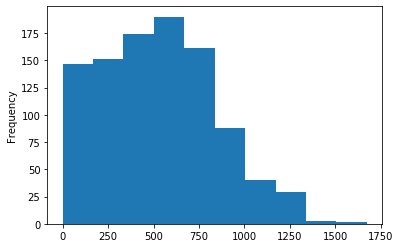

In [33]:
data[data['tariff'] == 'ultra']['duration'].plot(kind='hist', bins=10)

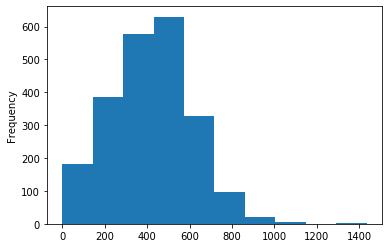

In [34]:
data[data['tariff'] == 'smart']['duration'].plot(kind='hist', bins=10)

*Клиента на тарифе ультра используют 550-600 мин., остается 2400 мин. Клиенты на смарте используют 450 - 500 мин. в основном, то есть расходуют практичеки весь лимит по тарифу*

**Рассмотрим использование трафика по тарифам**

In [35]:
data.groupby('tariff').agg({'mb_used':['median','mean']})

mb_used              
          median          mean
tariff                        
smart   16506.84  16208.386990
ultra   19308.01  19468.805208

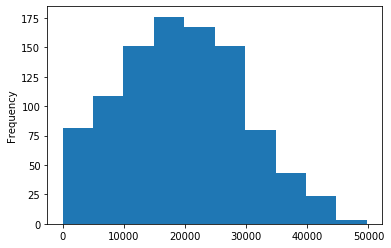

In [36]:
data[data['tariff'] == 'ultra']['mb_used'].plot(kind='hist', bins=10)

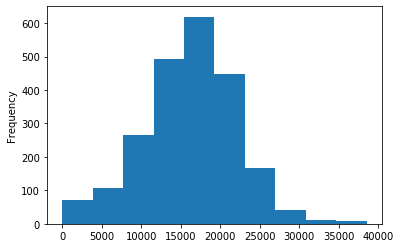

In [37]:
data[data['tariff'] == 'smart']['mb_used'].plot(kind='hist', bins=10)

*Разброс по тарифам, аналогичен разбросу по использованным минутам. На смарте выходят за лимиты, в ультиме остается запас.*

**Рассмотрим количество отправленных смс по тарифам**

In [38]:
data.groupby('tariff').agg({'msg_count':['median','mean']})

msg_count           
          median       mean
tariff                     
smart       28.0  33.384029
ultra       38.0  49.363452

*Разброса нет, все в рамках лимитов*

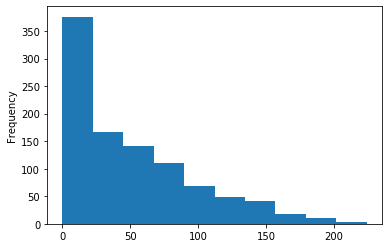

In [39]:
data[data['tariff'] == 'ultra']['msg_count'].plot(kind='hist', bins=10)

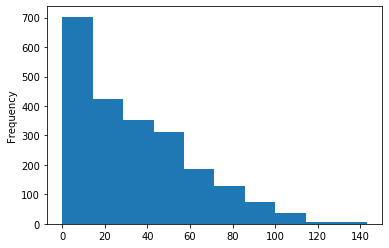

In [40]:
data[data['tariff'] == 'smart']['msg_count'].plot(kind='hist', bins=10)

*Большинство клиентов не пользуются смс в каждом из тарфиов, распределение по тарифам схоже*

**4. ПРОВЕРИМ ГИПОТЕЗЫ**

**Гипотезы**

**H0: выручка пользователей тарифов «Ультра» и «Смарт» не различаются**

**H1: выручка пользователей тарифов «Ультра» и «Смарт» различается**

*Сформируем таблицы тарифов и проведем t-тест*

In [41]:
ultra = data[data['tariff'] == 'ultra']
smart = data[data['tariff'] == 'smart']
ultra = ultra['total_payment']
smart = smart['total_payment']

#print(ultra.head())
#print(smart.head())

alpha = 0.05

results = st.ttest_ind(ultra, smart)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.006038465087073e-287
Отвергаем нулевую гипотезу


*Выручка клиентов тарифа смарт, отличается от выручки клиентов с тарифом ультра*

**Гипотезы**

**H0: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.**

**H1: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.**

In [42]:
data['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Курган', 'Барнаул', 'Красноярск', 'Архангельск', 'Липецк',
       'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Волжский', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [43]:
data['region'] = np.where(data['city'] == 'Москва', 'Москва', 'Регион')
moscow = data[data['region'] == 'Москва']
regions = data[data['region'] == 'Регион']

#print(moscow.head())
#print(regions.head())

moscow = moscow['total_payment']
regions = regions['total_payment']

#print(moscow.head())
#print(regions.head())

alpha = 0.05
results = st.ttest_ind(moscow, regions)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.2415176751866064
Не получилось отвергнуть нулевую гипотезу


Cредняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

**5. Выводы**

Поведение клиентов каждого тарифа различается. На Смарте намного чаще клиенты выходят из своих лимитов, что может негативно сказываться на удержании клиента. Клиенты тарифа ультра в основном не исчерпывают лимит своего тарифа по звонкам и трафику. Что касается смс, то явно данной услугой пользуется малое количество клиентов из 2х тарифов. Мессенжеры поглатили передачу текствых сообщений. В связи с этим, может подумать о  дополнительной метрики трафика для мессенджеров. 

Согласно проверки последних гипотез, видим, что выручка не акцентируется только на Москве, в распределена по регионам. 

Рекомендации: 
1. Подумать о дополнительной метрики трафика для мессенджеров. 
2. Рассмотреть возможность сформировать усредненный тариф, где клиенты будут подходить к краю лимита и при этом стоимость тарифа будет выше чем у смарт и ниже чем у ультра. 
